In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

df = pd.read_csv("Purchase_Card_Transactions.csv", sep=",")
# shows top 10 rows
df.head(10)
# do something

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
0,64,Department of Health,2009/01/06 05:00:00+00,4.75,NPDB NPDB-HIPDB.HRSA.G,VA,"Government Services, Not Elsewhere Classified"
1,65,Department of Health,2009/01/06 05:00:00+00,-464.48,PRESSTEK,NH,"Commercial Photography, Art & Graphics"
2,66,Department of Health,2009/01/05 05:00:00+00,425.00,AMERICAN ASSOC00 OF 00,VA,Charitable And Social Service Organizations
3,67,Department of Health,2009/01/06 05:00:00+00,4.75,HIPDB NPDB-HIPDB.HRSA.,VA,"Government Services, Not Elsewhere Classified"
4,68,Department of Health,2009/01/06 05:00:00+00,4.75,HIPDB NPDB-HIPDB.HRSA.,VA,"Government Services, Not Elsewhere Classified"
5,69,Fire & Emergency Medical Services,2009/01/06 05:00:00+00,2385.57,AWL*PRENTICE HALL,NJ,Direct Marketing-Not Elsewhere Classified
6,70,Department of Youth Rehabilitation Services,2009/01/06 05:00:00+00,1981.25,DC POST SECONDARY EDUC,DC,"College, Universities, Professional Schools"
7,71,Department of Health,2009/01/05 05:00:00+00,855.37,CAPITAL SERVICES AND S,DC,Office and Commercial Furniture
8,72,Fire & Emergency Medical Services,2009/01/06 05:00:00+00,320.00,"TOUCAN BUSINESS FORMS,",MD,"Industrial Supplies, Not Elsewhere Classified"
9,73,District Department of Transportation,2009/01/06 05:00:00+00,2231.43,JIMMIE MUSCATELLOS,DC,Uniforms and Commercial Clothing


In [2]:
#Testing with data

In [12]:
df.size

3037482

In [9]:
dict = {}
for ind in df.index: 
    if df['VENDOR_NAME'][ind] in dict.keys():
        dict[df['VENDOR_NAME'][ind]] += df['TRANSACTION_AMOUNT'][ind]
    else:
        dict[df['VENDOR_NAME'][ind]] = df['TRANSACTION_AMOUNT'][ind]

In [10]:
with open('vendor_net_worth.pickle', 'wb') as f:
    pickle.dump(dict, f)

In [11]:
with open('vendor_net_worth.pickle', 'rb') as f:
    vendor_net = pickle.load(f)

In [15]:
vendor_net['CAPITAL SERVICES AND S']

2778631.0199999963

In [22]:
vendorNegNet = {}
vendorPosNet = {}
vendorZeroNet = {}
for key, value in vendor_net.items():
    if value < 0:
        vendorNegNet[key] = value
    elif value == 0:
        vendorZeroNet[key] = value
    else:
        vendorPosNet[key] = value


642
54448
469
55559


<BarContainer object of 3 artists>

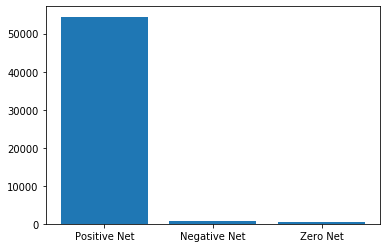

In [29]:
print(len(vendorNegNet))
print(len(vendorPosNet))
print(len(vendorZeroNet))

num_nets = {"Positive Net": len(vendorPosNet), "Negative Net": len(vendorNegNet), "Zero Net": len(vendorZeroNet)}

keys = num_nets.keys()
values = num_nets.values()
print(len(vendor_net))
plt.bar(keys, values)


In [13]:
print(dict['ROYALCUP'])

75.6
